In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import Adam

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)
print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')

x_train shape: (60000, 28, 28) y_train shape: (60000,)
60000 train set
10000 test set


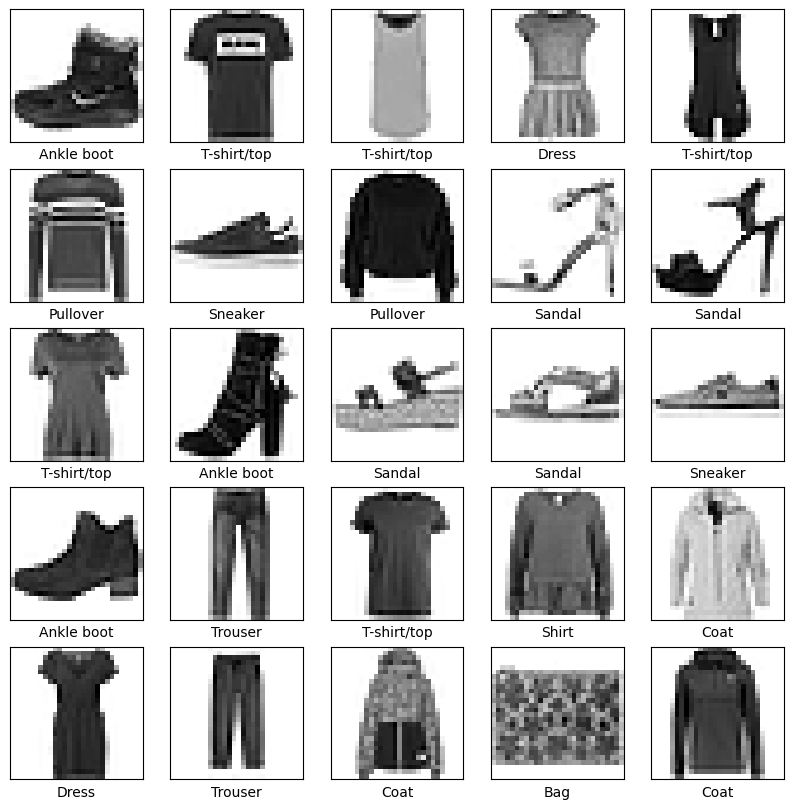

In [4]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show() 

In [5]:
x_train, x_test = x_train / 255.0, x_test / 255.0

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(288, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 288)               147744    
                                                                 
 dense_3 (Dense)             (None, 10)                2890      
                                                                 
Total params: 815210 (3.11 MB)
Trainable params: 815210 (3.11 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
LEARNING_RATE = 0.0001
EPOCHS = 20
BATCH_SIZE=96

model.compile(optimizer=Adam(learning_rate=LEARNING_RATE),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2)

Epoch 1/20
500/500 [==============================] - 11s 18ms/step - loss: 0.6282 - accuracy: 0.7950 - val_loss: 0.4476 - val_accuracy: 0.8432
Epoch 2/20
500/500 [==============================] - 8s 16ms/step - loss: 0.4094 - accuracy: 0.8567 - val_loss: 0.4256 - val_accuracy: 0.8504
Epoch 3/20
500/500 [==============================] - 9s 18ms/step - loss: 0.3685 - accuracy: 0.8683 - val_loss: 0.4526 - val_accuracy: 0.8325
Epoch 4/20
500/500 [==============================] - 9s 19ms/step - loss: 0.3396 - accuracy: 0.8790 - val_loss: 0.3660 - val_accuracy: 0.8705
Epoch 5/20
500/500 [==============================] - 10s 21ms/step - loss: 0.3174 - accuracy: 0.8847 - val_loss: 0.3464 - val_accuracy: 0.8735
Epoch 6/20
500/500 [==============================] - 9s 18ms/step - loss: 0.2973 - accuracy: 0.8933 - val_loss: 0.3213 - val_accuracy: 0.8848
Epoch 7/20
500/500 [==============================] - 8s 16ms/step - loss: 0.2816 - accuracy: 0.8982 - val_loss: 0.3221 - val_accuracy: 0.88

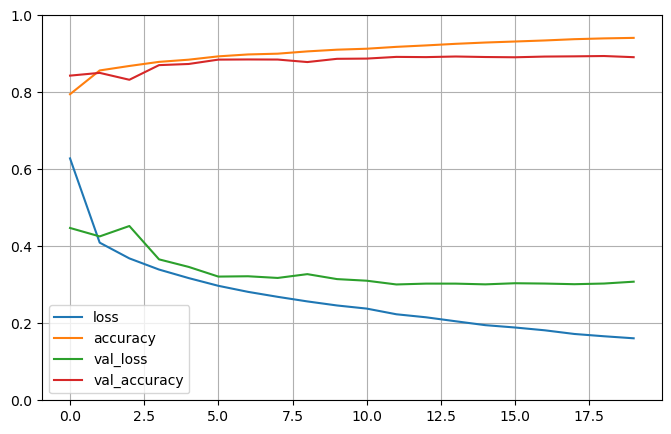

In [7]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [11]:
train_loss, train_accuracy = model.evaluate(x_train, y_train)
print(f"Train loss: {train_loss:.4f}")
print(f"Train accuracy: {train_accuracy:.4f}")

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

1875/1875 [==============================] - 6s 3ms/step - loss: 0.1783 - accuracy: 0.9370
Train loss: 0.1783
Train accuracy: 0.9370
313/313 [==============================] - 1s 3ms/step - loss: 0.3420 - accuracy: 0.8833
Test loss: 0.3420
Test accuracy: 0.8833


313/313 [==============================] - 1s 4ms/step


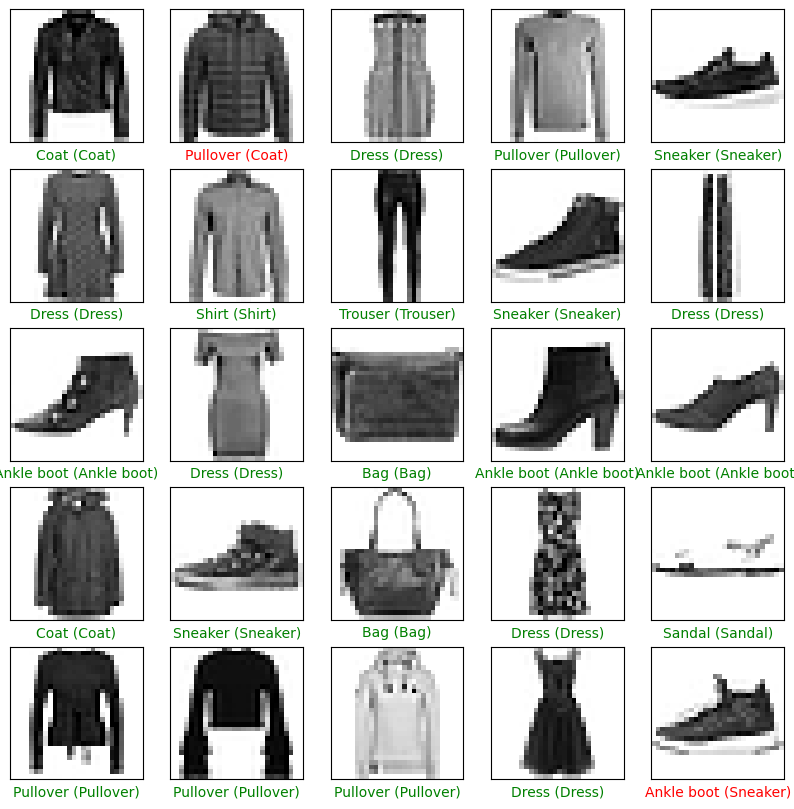

In [9]:
y_pred = model.predict(x_test)

figure = plt.figure(figsize=(10, 10))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=25, replace=False)):
    ax = figure.add_subplot(5, 5, i + 1, xticks=[], yticks=[])
    
    ax.imshow(np.squeeze(x_test[index]), cmap=plt.cm.binary)
    predict_index = np.argmax(y_pred[index])
    true_index = y_test[index]
    
    ax.set_xlabel('{} ({})'.format(class_names[predict_index], 
                                  class_names[true_index]),
                                  color=('green' if predict_index == true_index else 'red'))

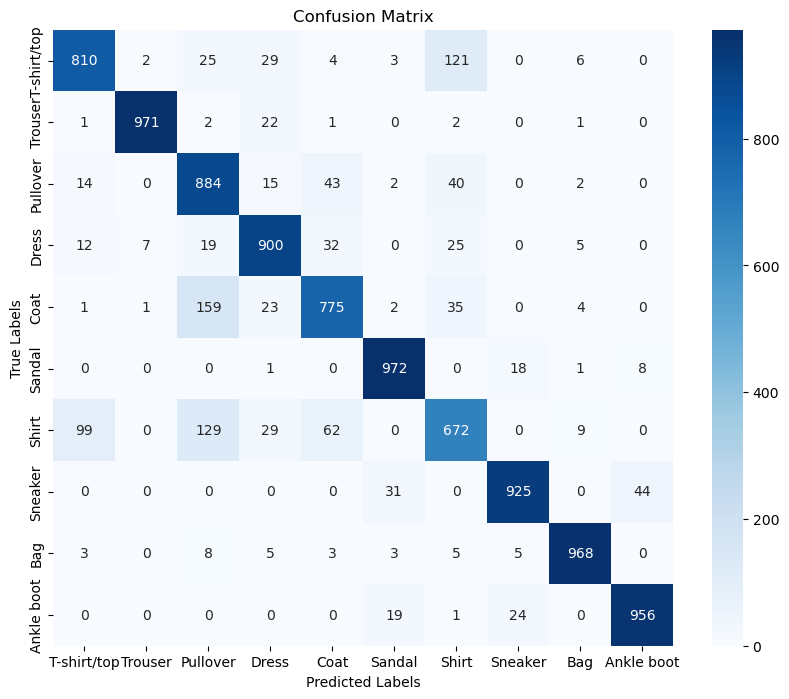

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

predicted_labels = np.argmax(y_pred, axis=1)

conf_matrix = confusion_matrix(y_test, predicted_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()